# FEATURE DESCRIPTION
Description:
A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. 

Data Dictionary:

price: Price of the Houses

area:Area of a House

bedrooms: Number of House Bedrooms

bathrooms: Number if Bathrooms

stories: Number of House Stories

mainroad: Wether connected to Main Road

guestroom: Wether has a guest room

basement: Wether has a basement

hotwaterheating: Wether has a hotwater heater

airconditioning: Wether has an airconditioning

parking: Number of House Parkings

prefarea: Prefarea of the House

furnishingstatus: Furnishing status of the House

# IMPORT LIBRARIES

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz

import warnings
warnings.filterwarnings('ignore')

# LOAD DATA

In [2]:
df = pd.read_csv('data/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


> <b>Based on the information above, it can be concluded that our dataset has 545 rows and 12 columns, and there are no missing values in our dataset.</b>

# PREPROCESSING

## OUTLIER HANDLING
> In this section we will handle outliers in our dataset using <b>winsorize</b>. Because we will use a model that is quite affected by outliers such as logistic regression.

In [5]:
def find_outliers(data):
    Q1 = data.quantile(.25)
    Q3 = data.quantile(.75)
    
    IQR = Q3 - Q1

    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    
    low_out = []
    upper_out = []
    
    for i in data:
        if(i < min_IQR):
            low_out.append(i)
        if(i > max_IQR):
            upper_out.append(i)
            
    return low_out, upper_out

In [6]:
def outlierwinsorize(dataframe, feature):
    lower_out = find_outliers(dataframe[feature])[0]
    upper_out = find_outliers(dataframe[feature])[1]
    
    print(f'Jumlah Outlier = {len(lower_out) + len(upper_out)}')
    persen_out = (len(lower_out) + len(upper_out))/len(dataframe)*100
    print(f'Presentasi Outlier = {round(persen_out, 2)}%')
    
    iqr = dataframe[feature].quantile(.75) - dataframe[feature].quantile(.25)   
    upper_limit = dataframe[feature].quantile(.75) + 1.5 * iqr
    print('Upper_limit', upper_limit)
    print('\n')
    
    j = 0
    for i in range(10):
        print(f'quantile {0.90+j} = {dataframe[feature].quantile(0.90 + j)}')
        j += 0.01

### price

In [7]:
df_win = df.copy()

In [8]:
outlierwinsorize(df_win, 'price')

Jumlah Outlier = 15
Presentasi Outlier = 2.75%
Upper_limit 9205000.0


quantile 0.9 = 7350000.0
quantile 0.91 = 7421400.000000001
quantile 0.92 = 7627200.000000003
quantile 0.93 = 7958300.000000001
quantile 0.9400000000000001 = 8227799.999999995
quantile 0.9500000000000001 = 8400000.0
quantile 0.9600000000000001 = 8653400.000000004
quantile 0.97 = 9055199.999999993
quantile 0.98 = 9695280.0
quantile 0.99 = 10541999.999999963


In [9]:
df_win['price_win'] = stats.mstats.winsorize(df['price'], limits=(0.0,0.03))

<Axes: >

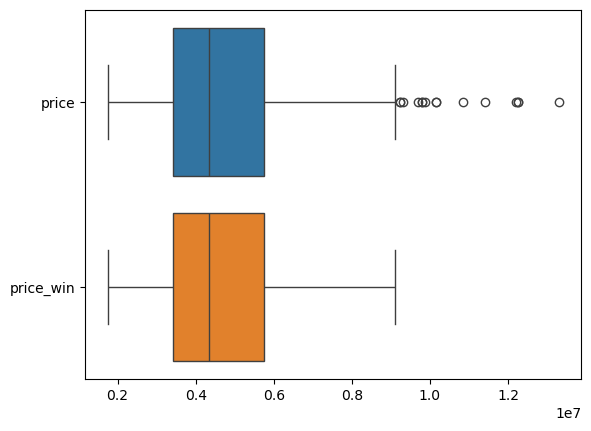

In [10]:
sns.boxplot(data = df_win[['price', 'price_win']], orient='h')

### area

In [11]:
outlierwinsorize(df_win, 'area')

Jumlah Outlier = 12
Presentasi Outlier = 2.2%
Upper_limit 10500.0


quantile 0.9 = 7980.0
quantile 0.91 = 8100.0
quantile 0.92 = 8250.0
quantile 0.93 = 8400.0
quantile 0.9400000000000001 = 8826.999999999996
quantile 0.9500000000000001 = 9000.0
quantile 0.9600000000000001 = 9631.280000000006
quantile 0.97 = 10259.72
quantile 0.98 = 10757.000000000002
quantile 0.99 = 12543.599999999955


In [12]:
df_win['area_win'] = stats.mstats.winsorize(df['area'], limits=(0.0,0.03))

<Axes: >

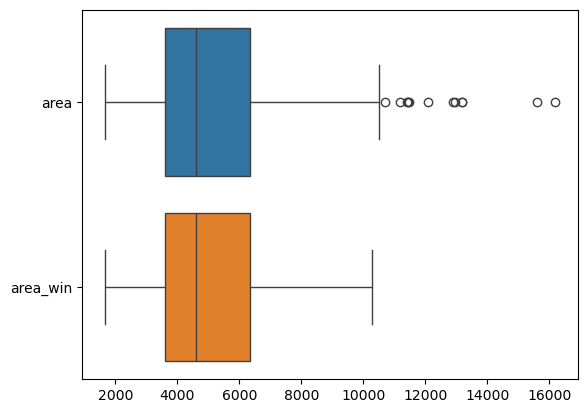

In [13]:
sns.boxplot(data = df_win[['area', 'area_win']], orient='h')

### bedrooms

In [14]:
outlierwinsorize(df_win, 'bedrooms')

Jumlah Outlier = 12
Presentasi Outlier = 2.2%
Upper_limit 4.5


quantile 0.9 = 4.0
quantile 0.91 = 4.0
quantile 0.92 = 4.0
quantile 0.93 = 4.0
quantile 0.9400000000000001 = 4.0
quantile 0.9500000000000001 = 4.0
quantile 0.9600000000000001 = 4.0
quantile 0.97 = 4.0
quantile 0.98 = 5.0
quantile 0.99 = 5.0


In [15]:
df_win['bedrooms_win'] = stats.mstats.winsorize(df['bedrooms'], limits=(0.0,0.03))

<Axes: >

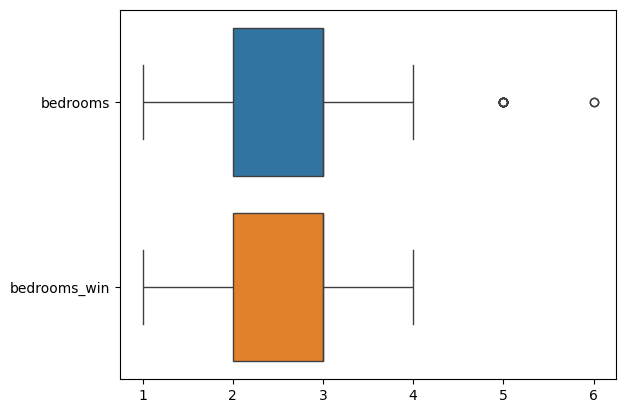

In [16]:
sns.boxplot(data = df_win[['bedrooms', 'bedrooms_win']], orient='h')

### bathrooms

In [17]:
df.select_dtypes(exclude='object').columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [18]:
outlierwinsorize(df_win, 'bathrooms')

Jumlah Outlier = 1
Presentasi Outlier = 0.18%
Upper_limit 3.5


quantile 0.9 = 2.0
quantile 0.91 = 2.0
quantile 0.92 = 2.0
quantile 0.93 = 2.0
quantile 0.9400000000000001 = 2.0
quantile 0.9500000000000001 = 2.0
quantile 0.9600000000000001 = 2.0
quantile 0.97 = 2.0
quantile 0.98 = 2.1200000000000045
quantile 0.99 = 3.0


In [19]:
df_win['bathrooms_win'] = stats.mstats.winsorize(df['bathrooms'], limits=(0.0,0.01))

In [20]:
1-0.99

0.010000000000000009

<Axes: >

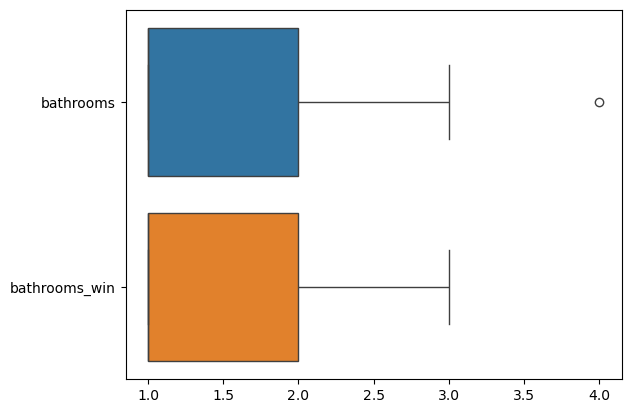

In [21]:
sns.boxplot(data = df_win[['bathrooms', 'bathrooms_win']], orient='h')

### stories

In [22]:
outlierwinsorize(df_win, 'stories')

Jumlah Outlier = 41
Presentasi Outlier = 7.52%
Upper_limit 3.5


quantile 0.9 = 3.0
quantile 0.91 = 3.0
quantile 0.92 = 3.0
quantile 0.93 = 4.0
quantile 0.9400000000000001 = 4.0
quantile 0.9500000000000001 = 4.0
quantile 0.9600000000000001 = 4.0
quantile 0.97 = 4.0
quantile 0.98 = 4.0
quantile 0.99 = 4.0


In [23]:
df_win['stories_win'] = stats.mstats.winsorize(df['stories'], limits=(0.0,0.08))

<Axes: >

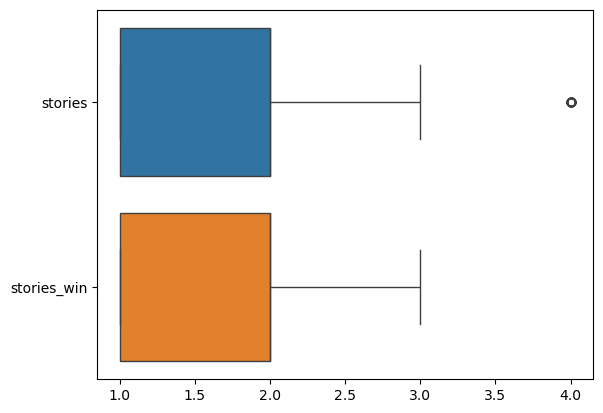

In [24]:
sns.boxplot(data = df_win[['stories', 'stories_win']], orient='h')

### parking

In [25]:
outlierwinsorize(df_win, 'parking')

Jumlah Outlier = 12
Presentasi Outlier = 2.2%
Upper_limit 2.5


quantile 0.9 = 2.0
quantile 0.91 = 2.0
quantile 0.92 = 2.0
quantile 0.93 = 2.0
quantile 0.9400000000000001 = 2.0
quantile 0.9500000000000001 = 2.0
quantile 0.9600000000000001 = 2.0
quantile 0.97 = 2.0
quantile 0.98 = 3.0
quantile 0.99 = 3.0


In [26]:
df_win['parking_win'] = stats.mstats.winsorize(df['parking'], limits=(0.0,0.03))

<Axes: >

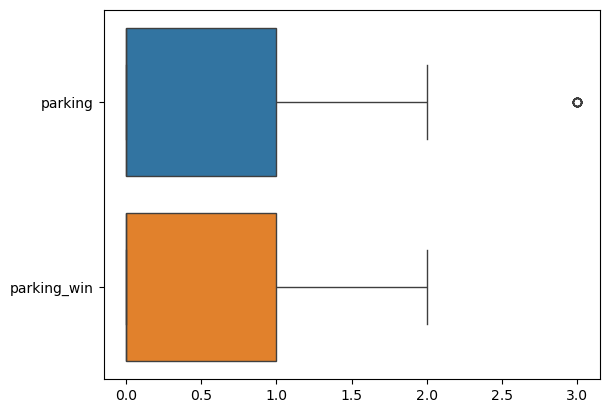

In [27]:
sns.boxplot(data = df_win[['parking', 'parking_win']], orient='h')

# Exploratory Data Analysis (EDA)

## NUMERICAL FEATURE

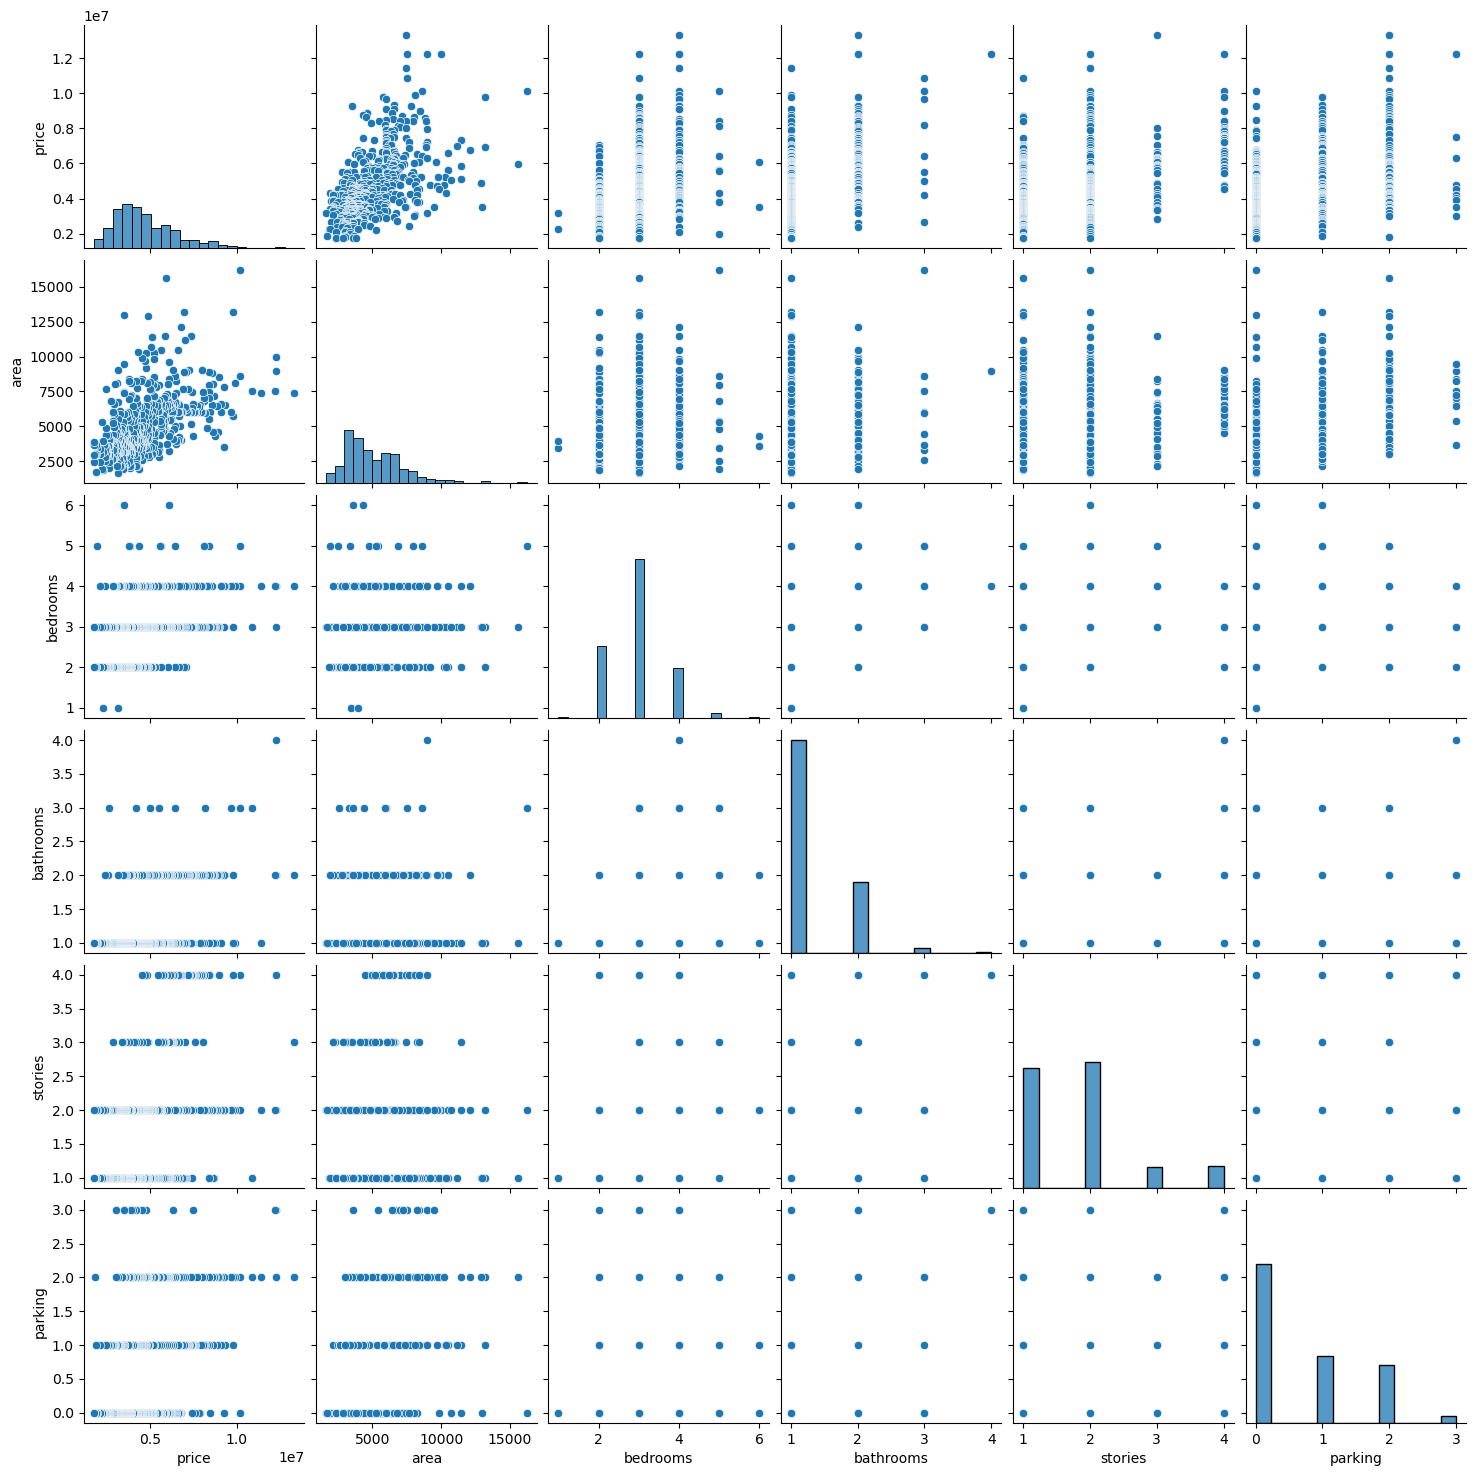

In [28]:
sns.pairplot(data=df.select_dtypes(exclude='object'))
plt.ticklabel_format(style='plain', axis='y')
plt.show()

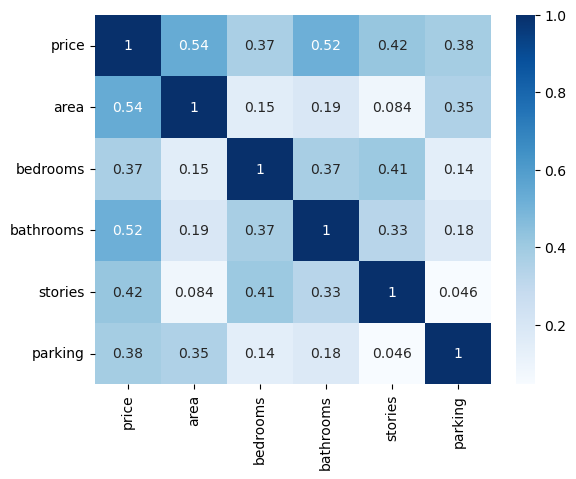

In [29]:
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='Blues')
plt.show()

In [30]:
df.select_dtypes(exclude='object').mode()

,price,area,bedrooms,bathrooms,stories,parking
0,3500000,6000.0,3.0,1.0,2.0,0.0
1,4200000,NaN,NaN,NaN,NaN,NaN


In [31]:
df.select_dtypes(exclude='object').describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


> ### Based on the above plots and descriptive statistics, we can conclude:
> 1. All numerical feature distributions <b>have positive skew </b>.
> 2. The strongest correlation between features is owned by the feature <b>price with area of 0.54</b> and <b>price with bathroms of 0.52</b>.
> 3. Most houses have a <b/>price range of 3500000 to 4200000 and have an average price of 4766729</b>.
> 4. Most houses have home<b> area of 6000 and have an average of 5150</b>.
> 4. Most homes have <b>3 bedrooms and have an average of 2,965 per home</b>.
> 5. Most homes have <b>1 bathroom and the average is 1,286</b>.
> 6. Most homes have <b>2 floors and average 1.85</b>.
> 7. Most homes <b>don't have a garage</b>.

## CATEGORICAL FEATURE

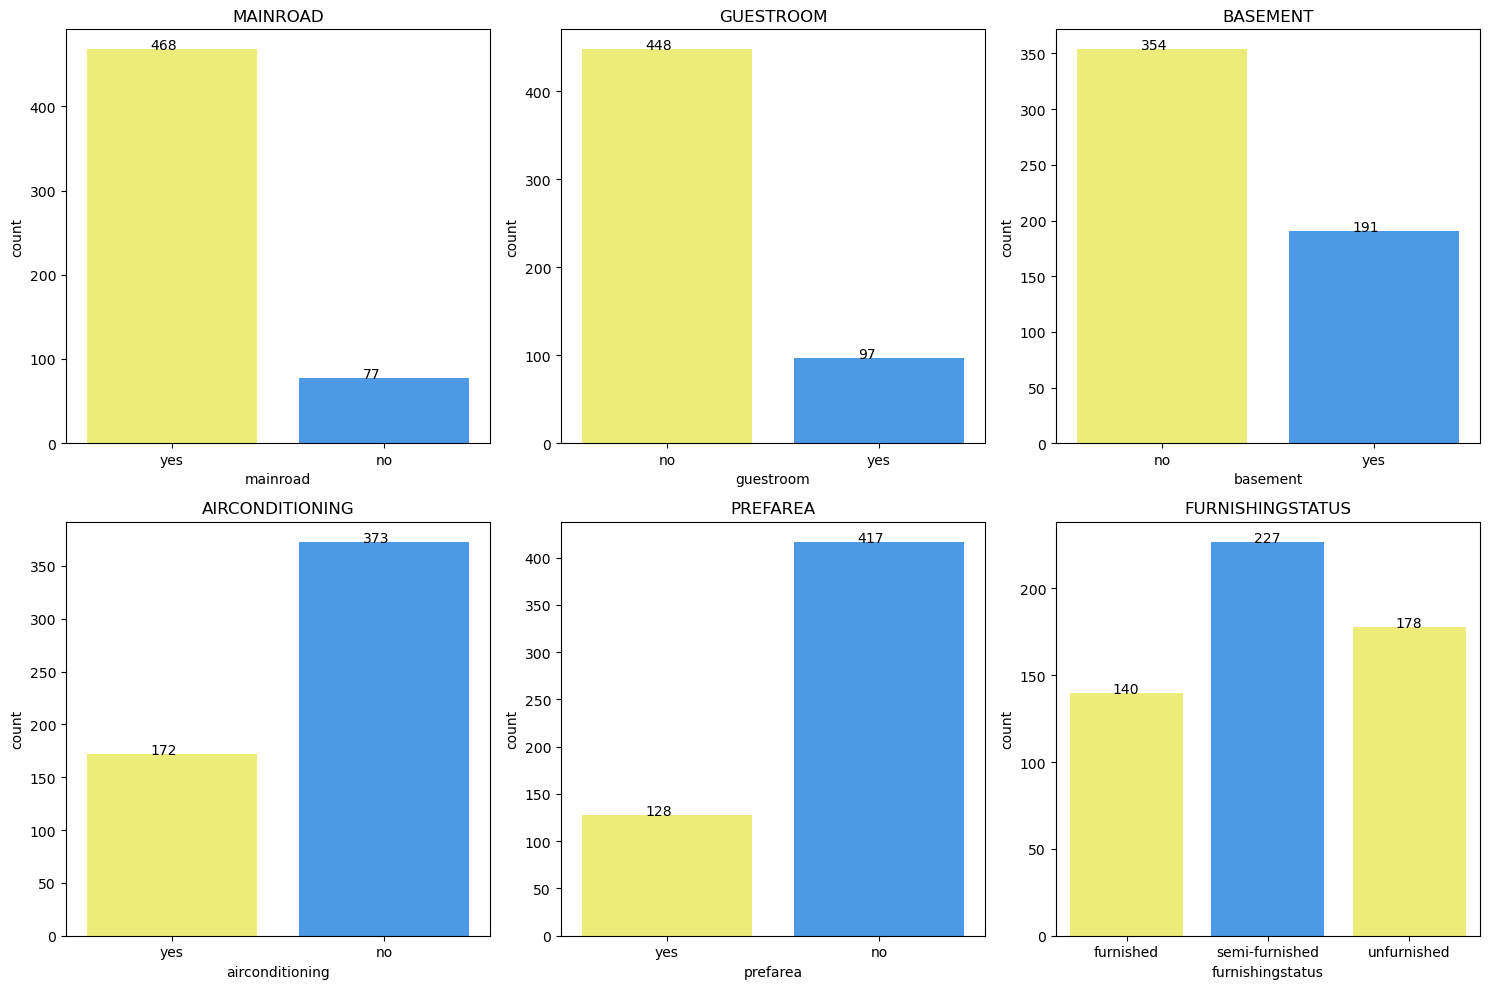

In [32]:
col = 0
row = 0
fig,ax =  plt.subplots(2,3, figsize=(15,10))

for i in df.select_dtypes(include='object'):
    if col < 3:
        z = sns.countplot(data=df, x=i, ax=ax[row][col], palette=['#FFFF66',"#3399FF"])
        for p in z.patches:
            z.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.02))
        ax[row][col].set_title(i.upper())
        col+=1
    else:
        col=0
        row+=1
plt.tight_layout()
plt.show()

> Based on the above plot, we can conclude:
> 1. <b>468 houses have been connected to the main road and 77 have not</b>.
> 2. <b>448 houses do not have guestrooms and 97 do</b>.
> 3. <b>354 houses do not have a basement and 191 do</b>.
> 4. <b>172 houses have airconditioning and 373 do not</b>.
> 5. <b>128 houses are located in the city's preferred neighborhood while 417 are not</b>.
> 6. <b>140 homes are furnished, 227 are semi-furnished and 178 are not.
> 7. All features <b>have data imbalance</b>.

# FEATURE ENGINEERING
> This section is used to transform raw data into features that can be used to create predictive models using Machine Learning or Statistical Modeling. Feature engineering in Machine Learning aims to improve model performance.

## FEATURE ENCODE
> Changing the categorical values to numerical data type so that our model can understand,

In [33]:
df_enc = df_win.copy()

In [34]:
df_enc = df_enc.drop(columns=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'])

In [35]:
df_enc.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,price_win,area_win,bedrooms_win,bathrooms_win,stories_win,parking_win
0,yes,no,no,no,yes,yes,furnished,9100000,7420,4,2,3,2
1,yes,no,no,no,yes,no,furnished,9100000,8960,4,3,3,2
2,yes,no,yes,no,no,yes,semi-furnished,9100000,9960,3,2,2,2
3,yes,no,yes,no,yes,yes,furnished,9100000,7500,4,2,2,2
4,yes,yes,yes,no,yes,no,furnished,9100000,7420,4,1,2,2


### ONE HOT ENCODING
> Changing nominal data to numerical data type(0/1).

In [36]:
for i in df_enc[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]:
    df_enc = pd.get_dummies(df_enc, prefix=i, columns=[i], drop_first=True)

In [37]:
df_enc.head()

,furnishingstatus,price_win,area_win,bedrooms_win,bathrooms_win,stories_win,parking_win,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,furnished,9100000,7420,4,2,3,2,True,False,False,False,True,True
1,furnished,9100000,8960,4,3,3,2,True,False,False,False,True,False
2,semi-furnished,9100000,9960,3,2,2,2,True,False,True,False,False,True
3,furnished,9100000,7500,4,2,2,2,True,False,True,False,True,True
4,furnished,9100000,7420,4,1,2,2,True,True,True,False,True,False


### ORDINAL ENCODING
> Changing the ordinal values in our feature dataset to numerical.

In [38]:
furniture_order = ['unfurnished', 'furnished', 'semi-furnished']
df_enc['furnishingstatus_enc'] = OrdinalEncoder().fit_transform(df_enc[['furnishingstatus']])
df_enc = df_enc.drop(columns=['furnishingstatus'])

In [39]:
df_enc.head()

,price_win,area_win,bedrooms_win,bathrooms_win,stories_win,parking_win,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_enc
0,9100000,7420,4,2,3,2,True,False,False,False,True,True,0.0
1,9100000,8960,4,3,3,2,True,False,False,False,True,False,0.0
2,9100000,9960,3,2,2,2,True,False,True,False,False,True,1.0
3,9100000,7500,4,2,2,2,True,False,True,False,True,True,0.0
4,9100000,7420,4,1,2,2,True,True,True,False,True,False,0.0


## FEATURE SCALLING
> Scaling the numerical features in our dataset to have the same scale, because some machine learning models are affected by distance so it's a good idea to scale these features so that the model can predict better.

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
df_scl = df_enc.copy()
scale = MinMaxScaler()

In [42]:
df_scl[['price_win','area_win','bedrooms_win','bathrooms_win','stories_win','parking_win']] = scale.fit_transform(df_scl[['price_win','area_win','bedrooms_win','bathrooms_win','stories_win','parking_win']])

In [43]:
df_scl.head()

,price_win,area_win,bedrooms_win,bathrooms_win,stories_win,parking_win,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_enc
0,1.0,0.669451,1.000000,0.5,1.0,1.0,True,False,False,False,True,True,0.0
1,1.0,0.848126,1.000000,1.0,1.0,1.0,True,False,False,False,True,False,0.0
2,1.0,0.964149,0.666667,0.5,0.5,1.0,True,False,True,False,False,True,1.0
3,1.0,0.678733,1.000000,0.5,0.5,1.0,True,False,True,False,True,True,0.0
4,1.0,0.669451,1.000000,0.0,0.5,1.0,True,True,True,False,True,False,0.0


## FEATURE SELECTION
> Selecting important features for our model uses feature importance which is based on a decision tree to lighten the performance of our model in order to better predict results.

In [44]:
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

In [45]:
df_slc = df_scl.copy()

In [46]:
x = df_slc.drop(columns=['price_win']) #independent feature
y = df_slc['price_win'] #target

[0.25251066 0.05417421 0.19593613 0.05053009 0.06343311 0.03097119
 0.03157523 0.03650357 0.02297068 0.14634872 0.04946324 0.06558318]


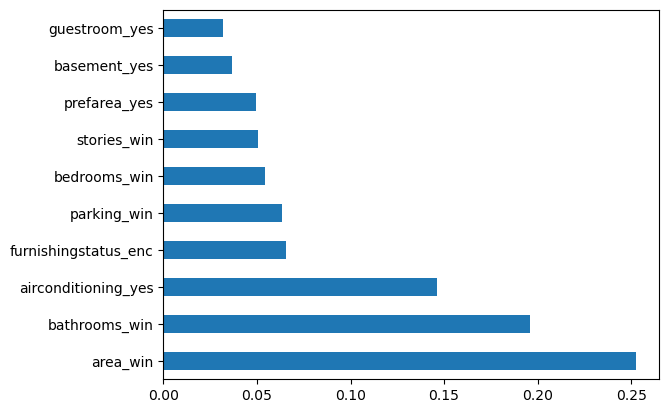

In [47]:
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [48]:
features = feat_importances.nlargest(10).index.tolist()

In [49]:
features.append('price_win')

In [50]:
df_slc = df_slc[features]

In [51]:
df_slc.head()

,area_win,bathrooms_win,airconditioning_yes,furnishingstatus_enc,parking_win,bedrooms_win,stories_win,prefarea_yes,basement_yes,guestroom_yes,price_win
0,0.669451,0.5,True,0.0,1.0,1.000000,1.0,True,False,False,1.0
1,0.848126,1.0,True,0.0,1.0,1.000000,1.0,False,False,False,1.0
2,0.964149,0.5,False,1.0,1.0,0.666667,0.5,True,True,False,1.0
3,0.678733,0.5,True,0.0,1.0,1.000000,0.5,True,True,False,1.0
4,0.669451,0.0,True,0.0,1.0,1.000000,0.5,False,True,True,1.0


# MODELLING

## MULTIPLE LINEAR REGRESSION
> Linear regression is also a type of machine-learning algorithm more specifically a supervised machine-learning algorithm that learns from the labelled datasets and maps the data points to the most optimized linear functions. which can be used for prediction on new datasets. 

In [52]:
x = df_slc.drop(columns=['price_win']).values
y = df_slc['price_win'].values.reshape(-1,1)

In [53]:
# tarin test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) #size test 20%

In [54]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = linear_reg.predict(X_test)

In [56]:
result = pd.DataFrame()
result['y_act'] = [i for i in y_test.flatten()]
result['y_pred'] = y_pred.flatten()

In [57]:
for i in range(X_test.shape[1]):
    result[f'X{i+1}'] = [j[i] for j in X_test]

In [58]:
result.head()

,y_act,y_pred,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,0.385714,0.319630,0.272653,0.0,False,0.0,0.5,0.666667,0.5,False,False,False
1,0.589524,0.617581,0.924701,0.0,False,0.0,1.0,0.666667,0.0,True,True,False
2,0.307143,0.349564,0.210001,0.0,True,1.0,0.0,1.000000,0.5,False,False,False
3,0.704762,0.509692,1.000000,0.0,False,0.0,0.5,0.333333,0.0,False,True,False
4,0.161905,0.218638,0.233206,0.0,False,2.0,0.0,1.000000,0.5,False,False,False


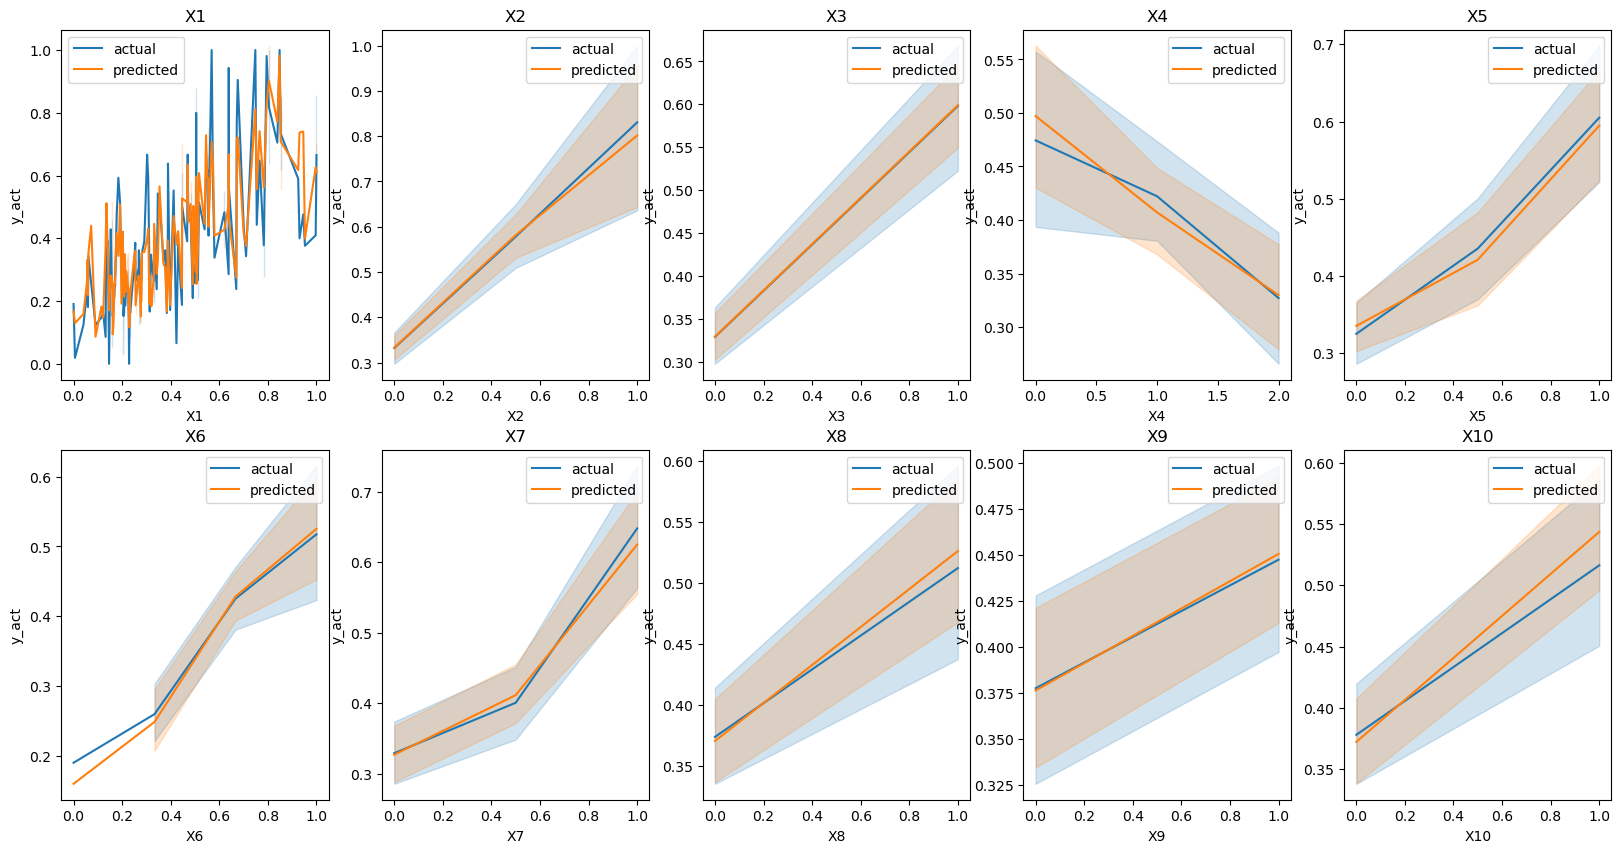

In [59]:
col = 0
fig, axs = plt.subplots(2,5, figsize=(20,10))
for i in range(1, 11):
    if col < 5:
        sns.lineplot(data=result, x=f'X{i}', y='y_act', label='actual', ax=axs[0][col])
        sns.lineplot(data=result, x=f'X{i}', y='y_pred', label='predicted', ax=axs[0][col])
        axs[0][col].title.set_text(f'X{i}')
    else:
        sns.lineplot(data=result, x=f'X{i}', y='y_act', label='actual', ax=axs[1][col-5])
        sns.lineplot(data=result, x=f'X{i}', y='y_pred', label='predicted', ax=axs[1][col-5])
        axs[1][col-5].title.set_text(f'X{i}')
    col +=1

In [60]:
round(metrics.r2_score(y_test, y_pred), 2)

0.71

In [61]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.1274269746826208


> From the results above, our linear regression model has an r square score of 0.71 and an rmse of 0.12.

## DECISION TREE
> Decision tree is one of the most powerful tools of supervised learning algorithms used for both classification and regression tasks. It builds a flowchart-like tree structure where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

In [62]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [63]:
y_pred2 = dt.predict(X_test)

In [64]:
type(y_test)

numpy.ndarray

In [65]:
type(y_pred2)

numpy.ndarray

In [66]:
result2 = pd.DataFrame()
result2['y_act'] = y_test.flatten()
result2['y_pred'] = y_pred2.flatten()

In [67]:
for i in range(X_test.shape[1]):
    result2[f'X{i+1}'] = [j[i] for j in X_test]

In [68]:
result2.head()

,y_act,y_pred,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,0.385714,0.429524,0.272653,0.0,False,0.0,0.5,0.666667,0.5,False,False,False
1,0.589524,0.476190,0.924701,0.0,False,0.0,1.0,0.666667,0.0,True,True,False
2,0.307143,0.461905,0.210001,0.0,True,1.0,0.0,1.000000,0.5,False,False,False
3,0.704762,0.523810,1.000000,0.0,False,0.0,0.5,0.333333,0.0,False,True,False
4,0.161905,0.238095,0.233206,0.0,False,2.0,0.0,1.000000,0.5,False,False,False


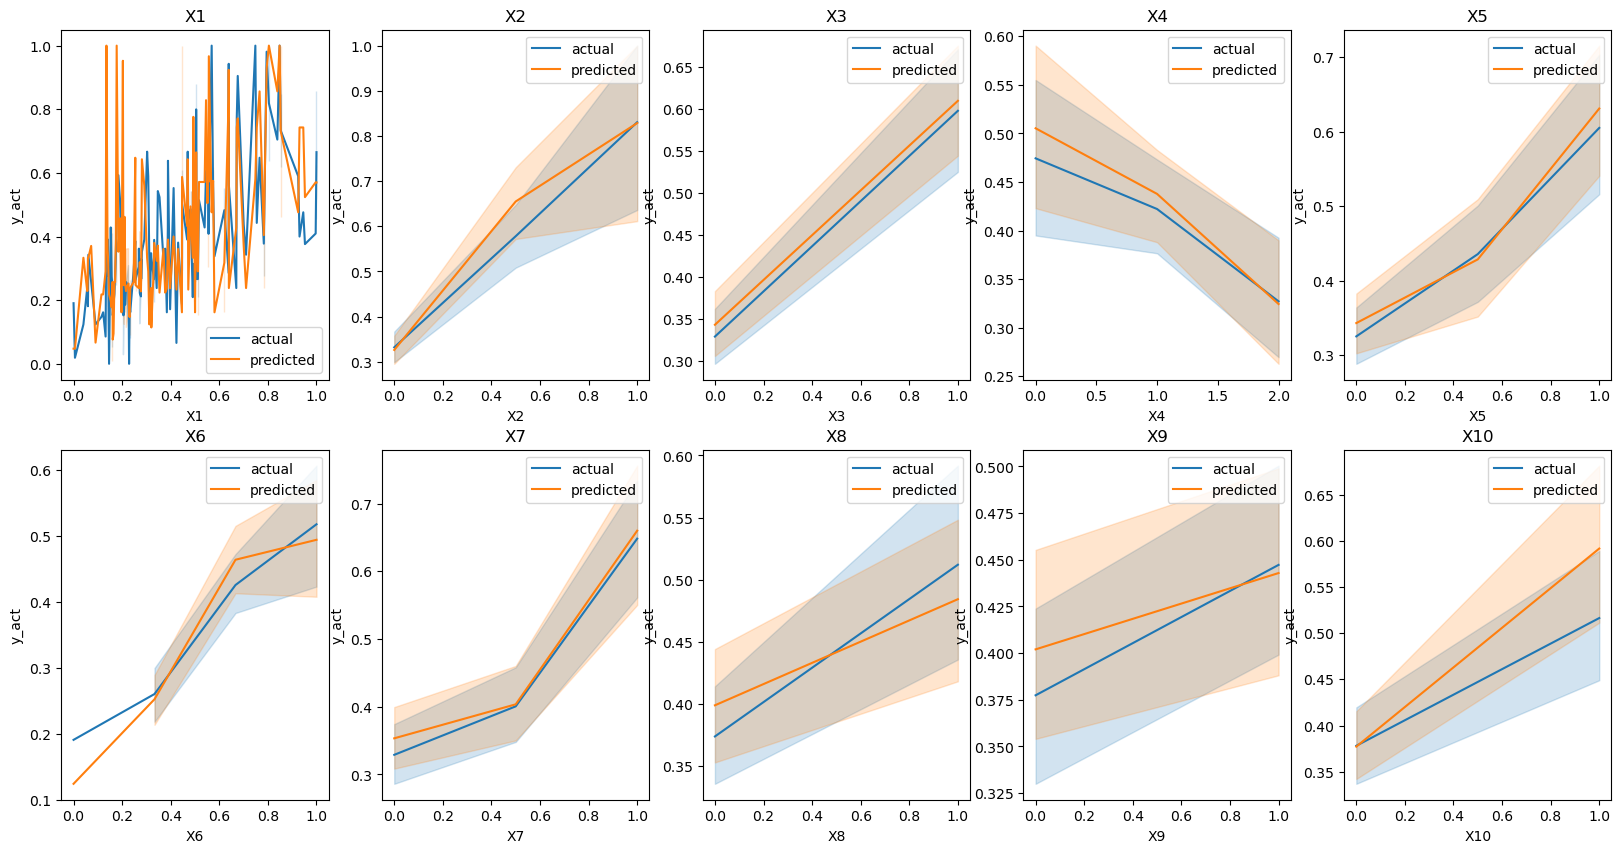

In [69]:
col = 0
fig, axs = plt.subplots(2,5, figsize=(20,10))
for i in range(1, 11):
    if col < 5:
        sns.lineplot(data=result2, x=f'X{i}', y='y_act', label='actual', ax=axs[0][col])
        sns.lineplot(data=result2, x=f'X{i}', y='y_pred', label='predicted', ax=axs[0][col])
        axs[0][col].title.set_text(f'X{i}')
    else:
        sns.lineplot(data=result2, x=f'X{i}', y='y_act', label='actual', ax=axs[1][col-5])
        sns.lineplot(data=result2, x=f'X{i}', y='y_pred', label='predicted', ax=axs[1][col-5])
        axs[1][col-5].title.set_text(f'X{i}')
    col +=1

In [70]:
round(metrics.r2_score(y_test, y_pred2), 2)

0.3

In [71]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

RMSE : 0.19721041389349833


> Based on the results above, our decision tree model has an r squared score of 0.28 and an rmse of 0.20..

## MODEL EVALUATION

In [77]:
df_model_eval = pd.DataFrame({
                'r2_score':[round(metrics.r2_score(y_test, y_pred), 2), round(metrics.r2_score(y_test, y_pred2), 2)],
                'RMSE' : [ np.sqrt(metrics.mean_squared_error(y_test, y_pred)), np.sqrt(metrics.mean_squared_error(y_test, y_pred2))]
             }, index=['Linear Regression', 'Decision Tree'])

In [79]:
df_model_eval

,r2_score,RMSE
Linear Regression,0.71,0.127427
Decision Tree,0.30,0.197210


> Based on that table it shows that <b>the best model for our dataset is linear regression because it has a larger r square and also has a smaller RMSEvalue </b>which is an indication that the model is better at predicted the target value.

# CONCLUSION

> 1. All numerical feature distributions <b>have positive skew </b>.
> 2. The strongest correlation between features is owned by the feature <b>price with area of 0.54</b> and <b>price with bathroms of 0.52</b>.
> 3. Most houses have a <b/>price range of 3500000 to 4200000 and have an average price of 4766729</b>.
> 4. Most houses have home<b> area of 6000 and have an average of 5150</b>.
> 4. Most homes have <b>3 bedrooms and have an average of 2,965 per home</b>.
> 5. Most homes have <b>1 bathroom and the average is 1,286</b>.
> 6. Most homes have <b>2 floors and average 1.85</b>.
> 7. Most homes <b>don't have a garage</b>.
> 8. <b>468 houses have been connected to the main road and 77 have not</b>.
> 9. <b>448 houses do not have guestrooms and 97 do</b>.
> 10. <b>354 houses do not have a basement and 191 do</b>.
> 11. <b>172 houses have airconditioning and 373 do not</b>.
> 12. <b>128 houses are located in the city's preferred neighborhood while 417 are not</b>.
> 13. <b>140 homes are furnished, 227 are semi-furnished and 178 are not.
> 14. All features <b>have data imbalance</b>.
> 15. Based on that table it shows that the best model for our dataset is <b>linear regression because it has a larger r square and also has a smaller RMSEvalue </b>which is an indication that the model is better at predicted the target value.

In [80]:
df_model_eval

,r2_score,RMSE
Linear Regression,0.71,0.127427
Decision Tree,0.30,0.197210
